Memoria asociativa lineal
===

* *30 min* | Última modificación: Junio 22, 2019

## Definición del problema real

Un sistema de transmisión es usado para enviar mensajes entre dos puntos diferentes mediante un alfabeto conformado por los dígitos 0, 1 y 2, los cuales son representados como bits de acuerdo con la figura que aparece abajo. El problema radica en que en el punto de recepción, el patrón recibido puede llegar incompleto o contaminado con ruido por lo que se desea construir un sistema que permita recuperar el patrón original a partir de patrón recibido que está incompleto o contaminado con ruido.  

![assets/ModelosAsociativos-01.png](assets/ModelosAsociativos-01.png)

## Definición del problema en términos de los datos

Cada patrón del alfabeto es representado como una cadena de 30 bits (0s y 1s), la cual es transmitida al receptor. Por ejemplo, el patrón del 0 podría ser (por filas):

    01110 10001 ... 01110

El patrón recibido, cuando está contaminado o incompleto, corresponde a una cadena de 30 bits que no coincide con ninguna de las cadenas que representan el alfabeto original. El problema consiste en tomar una cadena contaminada con ruido y transformarla en la cadena del alfabeto más parecida.  

## Metodología 

### Memoria asociativa

#### Definición

Este problema puede ser solucionado mediante una memoria lineal asociativa, la cual relaciona un patrón de actividad neuronal de entrada  con un patrón de actividad neuronal de salida. Existen dos fases:

* **Aprendizaje**: Un patrón clave es presentado como un estímulo. La memoria lo transforma a un patrón almacenado o memorizado.


![assets/ModelosAsociativos-02.png](assets/ModelosAsociativos-02.png)

* **Uso**: Se presenta una versión del patrón de entrada incompleta o con ruido y la memoria devuelve el patrón almacenado más parecido.

![assets/ModelosAsociativos-03.png](assets/ModelosAsociativos-03.png)

Las características de la memoria asociativa son las siguientes:


* La memoria es distribuida.


* Los patrones de estímulo y las respuestas son vectores de datos.


* La información se almacena en las neuronas a través de un patrón de actividad neural a través de un gran número de neuronas.


* La información contenida en el estímulo determina su localización de almacenamiento en la memoria y la dirección para su recuperación.


* La memoria tiene un alto grado de resistencia al ruido.


* Las interacciones entre patrones son almacenadas en la memoria.


#### Tipos

Conceptualmente se reconocen dos **tipos de asociación**:

* Autoasociación: El estímulo es asociado consigo mismo en la memoria.

![assets/ModelosAsociativos-04.png](assets/ModelosAsociativos-04.png)

* Heteroasociación: Vectores arbitrarios de estímulos son asociados con vectores arbitrarios de respuesta.

![assets/ModelosAsociativos-02.png](assets/ModelosAsociativos-02.png)


Por otra parte, se definen dos **tipos de memorias**:

* Memoria asociativa lineal: la neurona actúa como un combinador lineal: 
$$\mathbf{b}=\mathbf{Ma}$$
Donde $\mathbf{M}$ es la matriz de memoria, $\mathbf{a}$ el estímulo, y $\mathbf{b}$ la respuesta


* Memoria asociativa no lineal: 
$$\mathbf{b}=\Phi(\mathbf{M},\mathbf{a})$$
en la que $\Phi(.)$ es una función no lineal.


### Modelo matemático

#### Representación como una red neuronal artificial

Una memoria asociativa lineal puede representarse como la siguiente red neuronal:

![assets/ModelosAsociativos-05.png](assets/ModelosAsociativos-05.png)

donde:

* El $k$-ésimo estímulo o patrón clave es $\mathbf{a}_k = [a_{k1}, ..., a_{km}]^T$.


* El $k$-ésimo vector respuesta o patrón memorizado es $\mathbf{b}_k = [b_{k1}, ..., b_{kn}]$.


* La red asocia $\mathbf{a}_k$ con $\mathbf{b}_k$, esto es $\mathbf{a}_k \, \to \, \mathbf{b}_k$ como:

$$\mathbf{b}_k = \mathbf{M} \mathbf{a}_k$$

Para $Q$ patrones a asociar, la matriz $\mathbf{M}$ se calcula como:

$$\mathbf{M} = \sum_{k=1}^Q \mathbf{b}_k \mathbf{a}_k^T 
= [\mathbf{b}_1 ... \mathbf{b}_Q] 
 \begin{bmatrix} \mathbf{a}_1^T  \\ \vdots \\ \mathbf{a}_Q^T\end{bmatrix} 
= \mathbf{B} \mathbf{A}^T
$$

donde $\mathbf{A}$ es la matriz clave y $\mathbf{B}$ es la matriz memorizada.

#### Propagación de la señal

Cuando se presenta un estímulo $\mathbf{a}_j$ la respuesta será:

$$\mathbf{b} = 
\mathbf{M} \mathbf{a_j} = 
\sum_{k=1}^Q \mathbf{b}_k \mathbf{a}_k^T \mathbf{a}_j =
\sum_{k=1}^Q (\mathbf{a}_k^T \mathbf{a}_j) \mathbf{b}_k  =
(\mathbf{a}_j^T \mathbf{a}_j) \mathbf{b}_j + 
\sum_{\substack{k=1\\k \neq j}}^Q (\mathbf{a}_k^T \mathbf{a}_j) \mathbf{b}_k
$$

Ya que la red neuronal reproduce perfectamente la salida deseada $\mathbf{b}_j$, entonces:

* Cada patrón de entrada debe estar normalizado $\mathbf{a}_j^T \mathbf{a}_j = 1$.


* Los patrones de entrada deben ser ortogonales:
$$
\mathbf{a}_k^T \mathbf{a}_j = 
\begin{cases}
1, & k = j \\
0, & k \ne j
\end{cases}
$$

Y $Q$ debe ser menor que la dimensión de las claves.

**Actividad.---** Construya la matriz $\mathbf{M}$ para los siguientes patrones de entrenamiento (realice los cálculos usando NumPy):

* $\mathbf{a}_1 = [+0.5, -0.5, +0.5, -0.5]^T$, $\mathbf{b}_1 = [+1, -1]^T$.


* $\mathbf{a}_2 = [+0.5, +0.5, -0.5, -0.5]^T$, $\mathbf{b}_2 = [+1, +1]^T$.


#### Cómputo de los pesos mediante el método de la pseudoinversa

En este caso, los vectores de es:

$$\mathbf{b} = 
\mathbf{M} \mathbf{a_j} = 
(\mathbf{a}_j^T \mathbf{a}_j) \mathbf{b}_j + 
\sum_{\substack{k=1\\k \neq j}}^Q (\mathbf{a}_k^T \mathbf{a}_j) \mathbf{b}_k = 
\mathbf{b}_j + 
\sum_{\substack{k=1\\k \neq j}}^Q (\mathbf{a}_k^T \mathbf{a}_j) \mathbf{b}_k =
\mathbf{b}_j+ \mathbf{v}_j
$$

donde $\mathbf{b}_j$ es la respuesta deseada y $\mathbf{v}_j$ es un vector de ruido, con:

$$\mathbf{v}_j 
= \sum_{\substack{k=1\\k \neq j}}^Q (\mathbf{a}_k^T \mathbf{a}_j) \mathbf{b}_k 
= \sum_{\substack{k=1\\k \neq j}}^Q \cos (\mathbf{a}_k, \mathbf{a_j}) \mathbf{b}_k 
$$

Se puede minimizar el error cuando los patrones no son ortogonales aplicando la regla de la pseudoinversa.

* Se tienen $Q$ patrones de entrenamiento, con $Q>m$.


* Es posible definir una medida del error, tal como la suma de errores al cuadrado:
$$
J(\mathbf{M}) 
= \sum_{k=1}^Q \| \mathbf{b}_k - \mathbf{Ma}_k) \|^2
= \| \mathbf{B} - \mathbf{MA} \|^2
= \| \mathbf{E} \|^2
$$


* Derivando e igualando a cero:

$$ \mathbf{B} - \mathbf{MA} = 0 $$

$$ \mathbf{MA} = \mathbf{B} $$

$$ \mathbf{M} = \mathbf{B} \mathbf{A} ^{-1}$$


* Ya que $\mathbf{A}$ es una matriz rectangular, su inversa exacta no existe. Se recurre a la definición de psuedoinversa. 

$$ \mathbf{M} = \mathbf{B} \mathbf{A} ^{+}$$

$$ \mathbf{A}^{+} = (\mathbf{A}^T \mathbf{A})^{-1} \mathbf{A}^T $$

## Solución

Para el problema propuesto, se tienen tres  patrones de entrenamento, los cuales serán aprendidos por una red neuronal asociativa NO lineal. Este tipo de red neuronal se construye usando una memoria asociativa lineal en la que se cambia la función de activación. La arquitectura del modelo es la siguiente:

![assets/ModelosAsociativos-06.png](assets/ModelosAsociativos-06.png)

Las figuras son representadas mediante patrones binarios, $\{-1, +1\}$, donde $-1$ representa el blanco y $+1$ representa el negro.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython
import math

In [2]:
def plot_digits(x, y=None):
    """
    Genera el gráfico de patrones por parejas.
    
    x: lista con los patrones iniciales
    y: lista con los patrones limpios
    """
    N = len(x)
    if y is None:
        fig, axes = plt.subplots(1, N, figsize=(2.9, 1.2))
        for i, data in enumerate(x):
            axes[i].pcolor(data, edgecolors='grey', linewidths=1, cmap=plt.get_cmap('Greys'))
            axes[i].set(xticks=[], yticks=[])
    else:
        if N == 1:
            fig, axes = plt.subplots(N, 2, figsize=(2.0, 1.2))
            axes[0].pcolor(x[0], edgecolors='grey', linewidths=1, cmap=plt.get_cmap('Greys'))
            axes[1].pcolor(y[0], edgecolors='grey', linewidths=1, cmap=plt.get_cmap('Greys'))
            axes[0].set(xticks=[], yticks=[])
            axes[1].set(xticks=[], yticks=[])
        else:
            fig, axes = plt.subplots(N, 2, figsize=(2, 3))
            for i, (data_x, data_y) in enumerate(zip(x,y)):
                axes[i][0].pcolor(data_x, edgecolors='grey', linewidths=1, cmap=plt.get_cmap('Greys'))
                axes[i][1].pcolor(data_y, edgecolors='grey', linewidths=1, cmap=plt.get_cmap('Greys'))
                axes[i][0].set(xticks=[], yticks=[])
                axes[i][1].set(xticks=[], yticks=[])
    fig.tight_layout()
    plt.show()


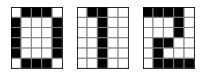

In [3]:
##
## Se representan los tres patrones como matrices
## Note que las matrices estan invertidas para
## efectos de graficación
## -1: blanco,  +1: negro
##

d0 = np.array([[-1, +1, +1, +1, -1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [-1, +1, +1, +1, -1]])

d1 = np.array([[-1, -1, +1, -1, -1],
               [-1, -1, +1, -1, -1],
               [-1, -1, +1, -1, -1],
               [-1, -1, +1, -1, -1],
               [-1, -1, +1, -1, -1],
               [-1, +1, +1, -1, -1]])

d2 = np.array([[-1, +1, +1, +1, +1],
               [-1, +1, -1, -1, -1],
               [-1, +1, +1, -1, -1],
               [-1, -1, -1, +1, -1],
               [-1, -1, -1, +1, -1],
               [+1, +1, +1, +1, -1]])

plot_digits(x=[d0, d1, d2])

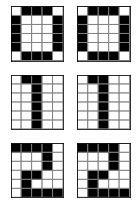

In [4]:
class ALM:
    def __init__(self):
        self.M = None
        
    def fit(self, x):
        ##
        ## Recibe una lista de matrices con los patrones
        ##
        x = [e.flatten() for e in x]            ## matrix a vector
        x = [e / math.sqrt(len(e)) for e in x]  ## normaliza los vectores
        x = [e.reshape(len(e), 1) for e in x]   ## vector-fila a vector-columna
        A = np.hstack(x)                        ## matriz A = [x0 x1 x2]
        self.M = A @ np.linalg.pinv(A)          ## B * inv(A' * A)
        
    def predict(self, x):
        ##
        ## x es una lista de matrices
        ##
        m, n = x[0].shape
        x = [e.flatten() for e in x]            ## matrix a vector
        x = [e / math.sqrt(len(e)) for e in x]  ## normaliza los vectores
        x = (e.reshape(len(e), 1) for e in x)   ## vector-fila a vector-columna
        x = [self.M @ e for e in x]
        x = [e.reshape(m,n) for e in x]
        return x

alm = ALM()
alm.fit([d0, d1, d2])
n = alm.predict([d0, d1, d2])
plot_digits(x=[d0, d1, d2], y=n)

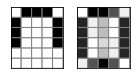

In [5]:
##
## Se ejecuta el modelo sobre patrones incompletos
## o contaminados con ruido
##
n0 = np.array([[-1, -1, -1, -1, -1],
               [-1, -1, -1, -1, -1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [-1, +1, +1, +1, -1]])

plot_digits(x=[n0], y=alm.predict([n0]))

## Los grises en la figura de abajo se producen porque
## la red genera salidas diferentes a {-1,+1}

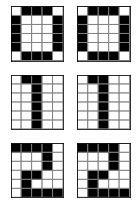

In [6]:
##
## Ya que se requiere que la salida sea {-1, +1}
## se modifica el codigo anterior agregando la
## función de activación de paso duro
##
class ANLM:
    def __init__(self):
        self.M = None
        
    def fit(self, x):
        x = [e.flatten() for e in x]            ## matrix a vector
        x = [e / math.sqrt(len(e)) for e in x]  ## normaliza los vectores
        x = [e.reshape(len(e), 1) for e in x]   ## vector-fila a vector-columna
        A = np.hstack(x)                        ## matriz A = [x0 x1 x2]
        self.M = A @ np.linalg.pinv(A)          ## B * inv(At * A)
        
    def predict(self, x):
        m, n = x[0].shape
        x = [e.flatten() for e in x]            ## matrix a vector
        x = [e / math.sqrt(len(e)) for e in x]  ## normaliza los vectores
        x = (e.reshape(len(e), 1) for e in x)   ## vector-fila a vector-columna
        x = [self.M @ e for e in x]
        ##
        ## ----- función de activación -------
        ##
        x = [np.sign(e) for e in x]
        ##
        ## ------------------------------------
        ##
        x = [e.reshape(m,n) for e in x]
        return x

anlm = ANLM()
anlm.fit([d0, d1, d2])
n = anlm.predict([d0, d1, d2])
plot_digits(x=[d0, d1, d2], y=n)

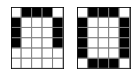

In [7]:
##
## Se ejecuta el modelo sobre patrones incompletos
## o contaminados con ruido
##
n0 = np.array([[-1, -1, -1, -1, -1],
               [-1, -1, -1, -1, -1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [+1, -1, -1, -1, +1],
               [-1, +1, +1, +1, -1]])

plot_digits(x=[n0], y=anlm.predict([n0]))

**Actividad.---** Verifique si las siguientes reconstrucciones son correctas.

![assets/ModelosAsociativos-07.png](assets/ModelosAsociativos-07.png)

**Actividad.---** Implemente el algoritmo anterior usando las operaciones elementales de TensorFlow y con compare los resultados obtenidos usando NumPy.

## Apéndice --- Lenguaje R

### Representación numérica de los patrones de ejemplo

In [8]:
%%R
##
## Se representan los tres patrones como matrices
## Note que las matrices estan invertidas para
## efectos de graficación
## -1: blanco,  +1: negro
##

a0 <-
t(matrix(cbind(c(-1, +1, +1, +1, -1),  #    ###
               c(+1, -1, -1, -1, +1),  #   #   #
               c(+1, -1, -1, -1, +1),  #   #   #
               c(+1, -1, -1, -1, +1),  #   #   #
               c(+1, -1, -1, -1, +1),  #   #   #
               c(-1, +1, +1, +1, -1)), #    ###
         5, 6))

a1 <-
t(matrix(cbind(c(-1, -1, +1, -1, -1),  #     #
               c(-1, -1, +1, -1, -1),  #     #
               c(-1, -1, +1, -1, -1),  #     #
               c(-1, -1, +1, -1, -1),  #     #
               c(-1, -1, +1, -1, -1),  #     #
               c(-1, +1, +1, -1, -1)), #    ##
         5, 6))         

a2 <-
t(matrix(cbind(c(-1, +1, +1, +1, +1),  #     ####
               c(-1, +1, -1, -1, -1),  #    #
               c(-1, +1, +1, -1, -1),  #    ##
               c(-1, -1, -1, +1, -1),  #      #
               c(-1, -1, -1, +1, -1),  #      #
               c(+1, +1, +1, +1, -1)), #   #### 
         5, 6))                  

### Función de graficación de los patrones binarios

In [9]:
%%R
##
## La siguiente función permite graficar una matriz
## de +1s y -1s como una malla de cuadros blancos y 
## negros
##

plot_digits <- function(x, y = NULL){

    ##
    ## Obtiene la cantidad de ejemplos a graficar
    ##
    N <- length(x)

    if(is.null(y)){
        ##
        ## Solo se están pasando los ejemplos originales
        ## en el parámetro x
        ##
        
        ## Se define el tamaño del área del gráfico
        options(repr.plot.width=0.9, repr.plot.height=1.2*N)
        
        ## Se fija el tamaño de las margenes de cada figura
        par(mar=c(1,1,1,1))
        
        ## Se define una columna de gráficas
        par(mfrow=c(N,1))
        for(i in 1:N){
            image(t(x[[i]]), col = grey(seq(1, 0, length = 2)), xaxt="n", yaxt= "n")
            grid()
        }
    } else {
        ##
        ## Se pasan los ejemplos originales en x y 
        ## los patrones reconstruidos en el parámetro y
        ##
        
        ## Se define el tamaño del área del gráfico
        options(repr.plot.width=0.9*2, repr.plot.height=1.2*N)
        
        ## Se fija el tamaño de las margenes de cada figura
        par(mar=c(1,1,1,1))
        
        ## Se definen dos columnas de gráficas
        par(mfrow=c(N,2))
        for(i in 1:N){
            image(t(x[[i]]), col = grey(seq(1, 0, length = 2)), xaxt="n", yaxt= "n")
            grid()
            image(t(y[[i]]), col = grey(seq(1, 0, length = 2)), xaxt="n", yaxt= "n")
            grid()
        }        
    }    
}

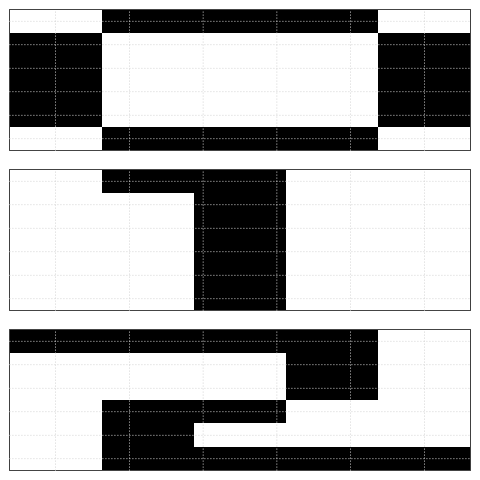

In [19]:
%%R
## Se grafican los tres patrones de ejemplo
## para verificar que la codificación manual
## sea correcta
options(repr.plot.width=2, repr.plot.height=4)
plot_digits(list(a0, a1, a2))

In [11]:
%%R
##
## Esta funcion crea directamente la matriz M
## que representa los pesos de la red neuronal.
##
fit_alm <- function(x) {
    ##
    ## x es una lista de matrices que representan
    ## los patrones a ser aprendidos
    ##
    
    ## convierte cada matriz en un vector
    x <- lapply(x, as.vector)
    
    ## hace cada vector unitario
    n <- lapply(x, function(v) return(v / sqrt(sum(v^2))))
                
    ## convierte los elementos a una matriz
    m <- matrix(unlist(n, use.names=FALSE), nrow=length(n[[1]]), ncol=length(x))
                
    ## computa la matriz por minimos cuadrados
    mplus <- solve( t(m) %*% m ) %*% t(m)
    return(m %*% mplus)
}

In [12]:
%%R
##
## Crea una memoria asociativa lineal para 
## el ejemplo presentado
##
M <- fit_alm(list(a0, a1, a2))

In [13]:
%%R
##
## Dada la matriz M, esta función permite
## pronosticar el patrón de salida a partir
## de un patrón de entrada x
##
predict_alm <- function(M, x) {

    ## convierte cada matriz en un vector
    y <- lapply(x, as.vector)
    
    ## hace cada vector unitario
    n <- lapply(y, function(v) return(v / sqrt(sum(v^2))))
                
    ## computa la multiplicación de M * x para cada vector
    ## se aplica la función sign para transformar la salida 
    ## a {-1, +1}
    r <- lapply(n, function(v) return(sign(M %*% v)))
                
    ## convierte cada vector en una matriz con las mismas
    ## dimensiones de la original
    r <- lapply(r, function(v) return(matrix(v, nrow(x[[1]]), ncol(x[[1]]))))

    return(r)
}

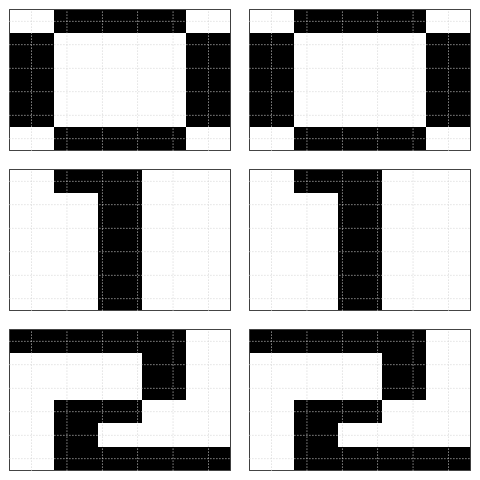

In [14]:
%%R
##
## Se verifica que la red haya aprendido los
## patrones suministrados. La columna izquierda
## contiene el patrón original. La columna
## derecha presenta el patrón reconstruido
##
plot_digits(x=list(a0, a1, a2), y=predict_alm(M, x=list(a0, a1, a2)))

### Reconstrucción de patrones incompletos o contaminados con ruido

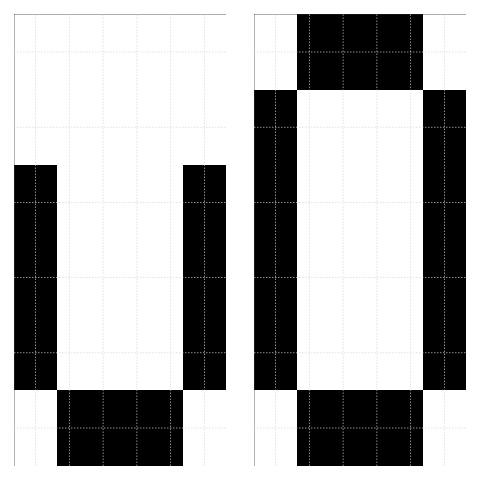

In [15]:
%%R
##
## Se ejecuta el modelo sobre patrones incompletos
## o contaminados con ruido
##
p0 <-
t(matrix(cbind(c(-1, +1, +1, +1, -1),
               c(+1, -1, -1, -1, +1),
               c(+1, -1, -1, -1, +1),
               c(+1, -1, -1, -1, +1),
               c(-1, -1, -1, -1, -1),
               c(-1, -1, -1, -1, -1)),
         5, 6))

##
## La figura de la izquierda es el patrón incompleto,
## la figura de la derecha es el patrón reconstruido
##
plot_digits(x=list(p0), y=predict_alm(M, list(p0)))

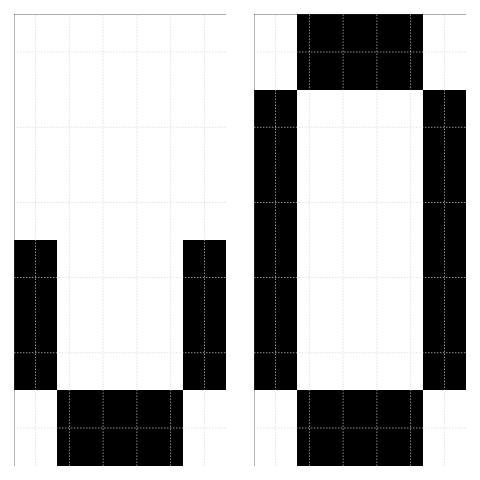

In [16]:
%%R
p0 <-
t(matrix(cbind(c(-1, +1, +1, +1, -1),
               c(+1, -1, -1, -1, +1),
               c(+1, -1, -1, -1, +1),
               c(-1, -1, -1, -1, -1),
               c(-1, -1, -1, -1, -1),
               c(-1, -1, -1, -1, -1)),
         5, 6))

plot_digits(x=list(p0), y=predict_alm(M, list(p0)))

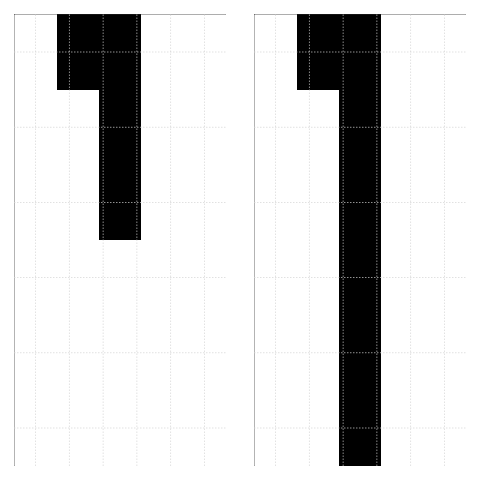

In [17]:
%%R
p1 <-
t(matrix(cbind(c(-1, -1, -1, -1, -1),
               c(-1, -1, -1, -1, -1),
               c(-1, -1, -1, -1, -1),
               c(-1, -1, +1, -1, -1),
               c(-1, -1, +1, -1, -1),
               c(-1, +1, +1, -1, -1)),
         5, 6))

plot_digits(x=list(p1), y=predict_alm(M, list(p1)))